# 3D dose map analysis

Use the output of the following simulation:
- Folder: dosimetry/
- Macros: ex2.mac, ex3.mac

Helping ressources: http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
from ipywidgets import interact
import os
from pathlib import Path

In order to be able to run the interactive plot, you must install ipympl as indicated here: https://github.com/matplotlib/ipympl
This is activated by the previous `%matplotlib widget` line.

In [2]:
# The following command display the current working directory (where jupyter has been launched)
cwd = os.getcwd()
print('The Current Working Directory (CWD) is: \n', cwd)
folder = Path()
if (not folder.is_dir()):
    print('ERROR: {} is not a folder.'.format(folder))

The Current Working Directory (CWD) is: 
 /home/vgate/WORK/geant4course/SSFM/GATE_exercises/2_dosimetry


In [3]:
# Read a sitk image
filename = os.path.join(folder,'./data/patient-2mm.mhd')
img_ct = sitk.ReadImage(filename)
print('Image size: ', img_ct.GetSize())
print('Image spacing: ', img_ct.GetSpacing())
print('Image origin: ', img_ct.GetOrigin())

Image size:  (126, 126, 111)
Image spacing:  (2.0, 2.0, 2.0)
Image origin:  (0.0, 0.0, 0.0)


In [4]:
# Convert sitk image to a numpy array
arr_ct = sitk.GetArrayFromImage(img_ct)
print('Array size: ', arr_ct.shape, ' <--- be careful to the dimension order!)')

Array size:  (111, 126, 126)  <--- be careful to the dimension order!)


interactive(children=(IntSlider(value=63, description='sx', max=126), IntSlider(value=63, description='sy', ma…

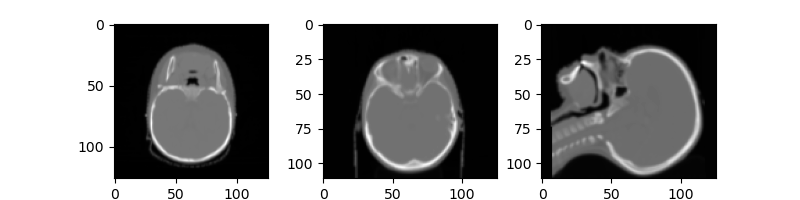

In [6]:
fig, ax = plt.subplots(1,3, figsize=(8, 2))
def show_ct(sx,sy,sz):
    ax[0].imshow(arr_ct[sz,:,:], cmap=plt.cm.gray)
    ax[1].imshow(arr_ct[:,sx,:], cmap=plt.cm.gray)
    ax[2].imshow(arr_ct[:,:,sy], cmap=plt.cm.gray)
    
interact(show_ct, sx=(0,img_ct.GetSize()[0]), sy=(0,img_ct.GetSize()[1]), sz=(0,img_ct.GetSize()[2]));

In [7]:
# normalize the dose map between 0 and 100
# but warning : need a lot of primary particle to be able to see something
img_dose = sitk.ReadImage('./output/3d-pat-Dose.mhd')
filter = sitk.RescaleIntensityImageFilter()
filter.SetOutputMaximum(100.0)
filter.SetOutputMinimum(0.0)
img_dose = filter.Execute(img_dose)
sitk.WriteImage(img_dose, './output/3d-pat-Dose-norm.mhd')